# Week 12 - Competition -IoT and Sensor Data Analysis

### 1.Data Collection

## Tetuan City power consumption

From IoT and Sensor data analysis category, Tetuan City power consumption data is selcted for analysis.
This dataset  has a total of 11 columns and 2000 rows.
The features of the dataset are 

- Temperature
- Humidity
- Pressure
- CloudCover
- Wind Speed
- General_diffuse_flows	
- Diffuse_flows

Target is __Total_power_consumption__ which is the combination of 
- Zone1_PowerConsumption
- Zone2_ PowerConsumption
- Zone3_PowerConsumption.



In [107]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
import warnings
warnings.filterwarnings(action="ignore")

In [109]:
# importing data set in to python envirinment 
df= pd.read_excel("power consumption.xlsx")

In [110]:
#first five rows of dataset
df.head()

,DateTime,Temperature,Humidity,Pressure,CloudCover,Wind Speed,General_diffuse_flows,Diffuse_flows,Zone1_PowerConsumption,Zone2_ PowerConsumption,Zone3_PowerConsumption
0,2017-01-01 00:00:00,6.559,73.8,1016.91,0.23,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,1016.91,0.23,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,1016.91,0.23,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,1016.91,0.23,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,1016.91,0.23,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [111]:
#Last five rows of dataset
df.tail()

,DateTime,Temperature,Humidity,Pressure,CloudCover,Wind Speed,General_diffuse_flows,Diffuse_flows,Zone1_PowerConsumption,Zone2_ PowerConsumption,Zone3_PowerConsumption
1995,1/14/2017 20:30,13.04,76.3,1016.35,0.1,0.074,0.059,0.096,41577.72152,25378.72340,26145.54217
1996,1/14/2017 20:40,12.94,77.0,1016.35,0.1,0.072,0.033,0.156,41358.98734,25218.23708,25810.12048
1997,1/14/2017 20:50,12.96,76.8,1016.35,0.1,0.072,0.077,0.152,41006.58228,24962.91793,25335.90361
1998,1/14/2017 21:00,12.92,76.7,1016.35,0.1,0.073,0.062,0.108,40854.68354,24784.19453,25191.32530
1999,1/14/2017 21:10,13.04,76.6,1016.35,0.1,0.072,0.048,0.104,40386.83544,24568.99696,25058.31325


In [112]:
#shape of the dataset
df.shape

(2000, 11)

In [113]:
#columns present in the dataset
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Pressure', 'CloudCover',
       'Wind Speed', 'General_diffuse_flows', 'Diffuse_flows',
       'Zone1_PowerConsumption', 'Zone2_ PowerConsumption',
       'Zone3_PowerConsumption'],
      dtype='object')

In [114]:
#A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DateTime                 2000 non-null   object 
 1   Temperature              1999 non-null   float64
 2   Humidity                 1999 non-null   float64
 3   Pressure                 1999 non-null   float64
 4   CloudCover               2000 non-null   float64
 5   Wind Speed               2000 non-null   float64
 6   General_diffuse_flows    1999 non-null   float64
 7   Diffuse_flows            2000 non-null   float64
 8   Zone1_PowerConsumption   2000 non-null   float64
 9   Zone2_ PowerConsumption  2000 non-null   float64
 10  Zone3_PowerConsumption   2000 non-null   float64
dtypes: float64(10), object(1)
memory usage: 172.0+ KB


In [115]:
# Checking null values
df.isna().sum()

DateTime                   0
Temperature                1
Humidity                   1
Pressure                   1
CloudCover                 0
Wind Speed                 0
General_diffuse_flows      1
Diffuse_flows              0
Zone1_PowerConsumption     0
Zone2_ PowerConsumption    0
Zone3_PowerConsumption     0
dtype: int64

In [116]:
#Checking null values
df.isna().sum().sum()

4

There are 4 missing values in the dataset.

In [117]:
df.nunique()

DateTime                   2000
Temperature                 994
Humidity                    724
Pressure                     33
CloudCover                   18
Wind Speed                   48
General_diffuse_flows       873
Diffuse_flows               884
Zone1_PowerConsumption     1516
Zone2_ PowerConsumption    1515
Zone3_PowerConsumption     1169
dtype: int64

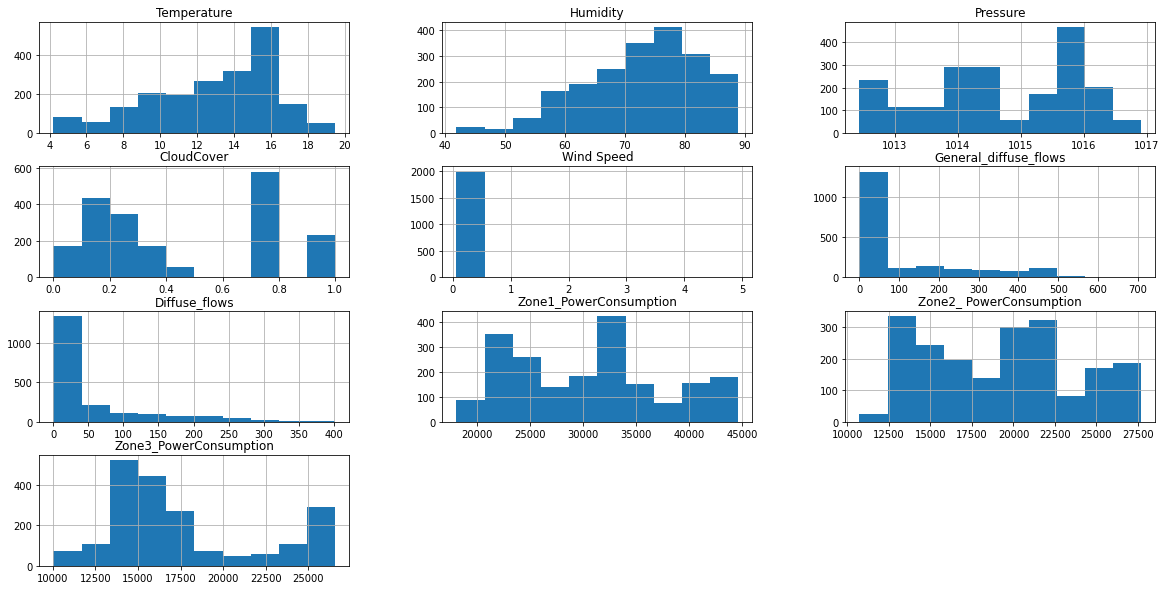

In [118]:
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,10))
plt.show()

From the graph, it is visible that there is skewness in each distribution. That is, data is not normally distributed.

In [119]:
df.dtypes

DateTime                    object
Temperature                float64
Humidity                   float64
Pressure                   float64
CloudCover                 float64
Wind Speed                 float64
General_diffuse_flows      float64
Diffuse_flows              float64
Zone1_PowerConsumption     float64
Zone2_ PowerConsumption    float64
Zone3_PowerConsumption     float64
dtype: object

### 2. Pre-processing

### 2.1. Missing value handling

Median is used to fill missing values in the dataset.

In [120]:
df["Temperature"]=df["Temperature"].fillna(df["Temperature"].median())
df["Humidity"]=df["Humidity"].fillna(df["Humidity"].median())
df["Pressure"]=df["Pressure"].fillna(df["Pressure"].median())
df["General_diffuse_flows"]=df["General_diffuse_flows"].fillna(df["General_diffuse_flows"].median())


In [121]:
# Checking null values
df.isna().sum()

DateTime                   0
Temperature                0
Humidity                   0
Pressure                   0
CloudCover                 0
Wind Speed                 0
General_diffuse_flows      0
Diffuse_flows              0
Zone1_PowerConsumption     0
Zone2_ PowerConsumption    0
Zone3_PowerConsumption     0
dtype: int64

In [122]:
# Checking null values
df.isna().sum().sum()

0

### 2.2 Feature Engineering

In [123]:
df["Total_Power_Consumption"]=df["Zone1_PowerConsumption"]+df["Zone2_ PowerConsumption"]+df["Zone3_PowerConsumption"]

In [124]:
df=df.drop(["Zone1_PowerConsumption","Zone2_ PowerConsumption","Zone3_PowerConsumption"],axis=1)

In [125]:
df.head()

,DateTime,Temperature,Humidity,Pressure,CloudCover,Wind Speed,General_diffuse_flows,Diffuse_flows,Total_Power_Consumption
0,2017-01-01 00:00:00,6.559,73.8,1016.91,0.23,0.083,0.051,0.119,70425.53544
1,2017-01-01 00:10:00,6.414,74.5,1016.91,0.23,0.083,0.070,0.085,69320.84387
2,2017-01-01 00:20:00,6.313,74.5,1016.91,0.23,0.080,0.062,0.100,67803.22193
3,2017-01-01 00:30:00,6.121,75.0,1016.91,0.23,0.083,0.091,0.096,65489.23209
4,2017-01-01 00:40:00,5.921,75.7,1016.91,0.23,0.081,0.048,0.085,63650.44627


In [126]:
df.shape

(2000, 9)

### 2.3.Feature Reduction

In [127]:
df=df.drop(["DateTime"],axis=1)

In [128]:
df.head()

,Temperature,Humidity,Pressure,CloudCover,Wind Speed,General_diffuse_flows,Diffuse_flows,Total_Power_Consumption
0,6.559,73.8,1016.91,0.23,0.083,0.051,0.119,70425.53544
1,6.414,74.5,1016.91,0.23,0.083,0.070,0.085,69320.84387
2,6.313,74.5,1016.91,0.23,0.080,0.062,0.100,67803.22193
3,6.121,75.0,1016.91,0.23,0.083,0.091,0.096,65489.23209
4,5.921,75.7,1016.91,0.23,0.081,0.048,0.085,63650.44627


In [129]:
df.columns

Index(['Temperature', 'Humidity', 'Pressure', 'CloudCover', 'Wind Speed',
       'General_diffuse_flows', 'Diffuse_flows', 'Total_Power_Consumption'],
      dtype='object')

### 2.4. Outlier detection and handling

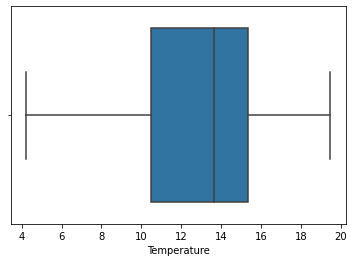

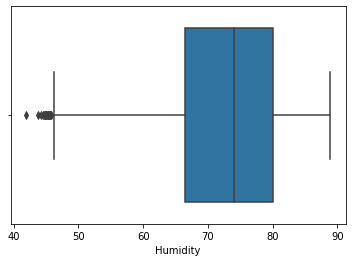

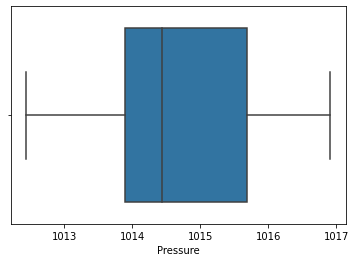

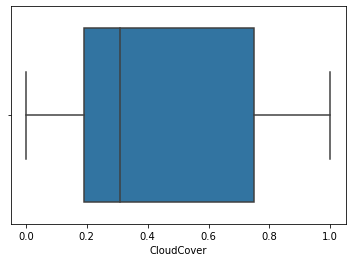

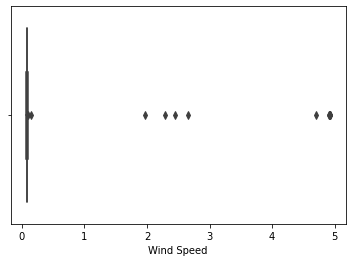

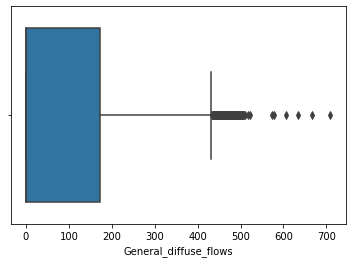

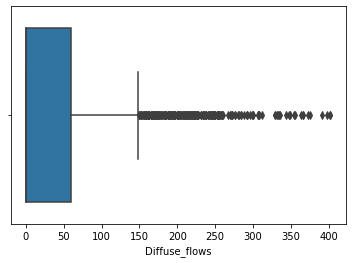

In [130]:
#checking for outliers
for i in ['Temperature', 'Humidity', 'Pressure', 'CloudCover', 'Wind Speed','General_diffuse_flows', 'Diffuse_flows']:
    sns.boxplot(x=df[i])
    plt.show()

In [131]:
#finding different quartile values of Humidity
Q1= np.percentile(df["Humidity"],25,interpolation="midpoint")
Q2= np.percentile(df["Humidity"],50,interpolation="midpoint")
Q3= np.percentile(df["Humidity"],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)

66.39500000000001
74.1
80.1


In [132]:
#finding IQR
IQR= Q3-Q1
IQR
#finding lowe limit & upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

45.837500000000034
100.65749999999997


In [133]:
#removing all the value below low limit& above upper limt
outlier=[]
for x in df["Humidity"]:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)

In [134]:
outlier

[44.6,
 44.74,
 44.77,
 45.04,
 44.17,
 44.84,
 45.61,
 45.74,
 45.14,
 44.84,
 45.8,
 45.37,
 45.0,
 45.33,
 45.56,
 45.36,
 45.39,
 45.26,
 41.89,
 43.79]

In [135]:
#finding index of this outliers & droping
index=df["Humidity"][(df["Humidity"]<low_lim)|(df["Humidity"]>up_lim)].index
df.drop(index,inplace=True)

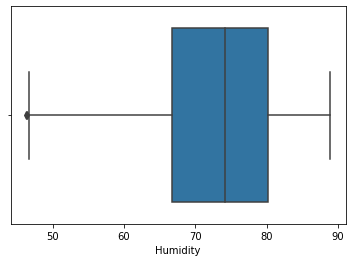

In [136]:
 sns.boxplot(x=df["Humidity"])

In [137]:
#finding different quartile values of Wind Speed
Q1= np.percentile(df["Wind Speed"],25,interpolation="midpoint")
Q2= np.percentile(df["Wind Speed"],50,interpolation="midpoint")
Q3= np.percentile(df["Wind Speed"],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)

0.075
0.079
0.085


In [138]:
#finding IQR
IQR= Q3-Q1
IQR
#finding lowe limit & upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

0.059999999999999984
0.10000000000000002


In [139]:
#removing all the value below low limit& above upper limt
outlier=[]
for x in df["Wind Speed"]:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)

In [140]:
outlier

[2.66,
 4.93,
 4.924,
 4.923,
 4.918,
 4.916,
 4.916,
 2.451,
 2.287,
 4.708,
 1.97,
 0.14,
 0.106]

In [141]:
#finding index of this outliers & droping
index=df["Wind Speed"][(df["Wind Speed"]<low_lim)|(df["Wind Speed"]>up_lim)].index
df.drop(index,inplace=True)

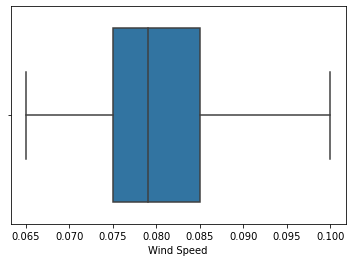

In [142]:
sns.boxplot(x=df["Wind Speed"])

In [143]:
#finding different quartile values of General_diffuse_flows
Q1= np.percentile(df["General_diffuse_flows"],25,interpolation="midpoint")
Q2= np.percentile(df["General_diffuse_flows"],50,interpolation="midpoint")
Q3= np.percentile(df["General_diffuse_flows"],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)

0.059
0.084
165.65


In [144]:
#finding IQR
IQR= Q3-Q1
IQR
#finding lowe limit & upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-248.32750000000001
414.03650000000005


In [145]:
#removing all the value below low limit& above upper limt
outlier=[]
for x in df["General_diffuse_flows"]:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)

In [146]:
outlier

[419.5,
 430.9,
 437.5,
 450.4,
 470.5,
 480.0,
 486.1,
 490.2,
 495.9,
 498.1,
 498.1,
 498.8,
 497.0,
 489.2,
 482.4,
 476.1,
 467.7,
 456.1,
 449.2,
 437.4,
 422.0,
 425.6,
 440.2,
 452.5,
 460.5,
 469.9,
 476.2,
 482.3,
 485.1,
 487.1,
 487.6,
 486.9,
 484.1,
 481.1,
 477.2,
 470.9,
 463.4,
 451.8,
 441.9,
 427.9,
 428.2,
 440.5,
 452.5,
 462.8,
 470.7,
 478.0,
 484.0,
 488.8,
 492.7,
 493.3,
 491.9,
 490.1,
 487.1,
 480.4,
 472.9,
 465.8,
 455.2,
 443.9,
 430.9,
 415.4,
 420.1,
 436.2,
 451.6,
 466.4,
 477.0,
 485.7,
 492.7,
 499.7,
 503.9,
 505.9,
 508.4,
 506.6,
 503.5,
 501.0,
 486.7,
 485.9,
 468.6,
 458.1,
 448.2,
 430.7,
 418.2,
 419.3,
 433.4,
 447.5,
 459.9,
 468.9,
 479.2,
 483.6,
 488.2,
 492.2,
 494.6,
 495.7,
 494.3,
 494.8,
 473.2,
 480.6,
 470.4,
 463.8,
 452.8,
 441.8,
 429.9,
 416.0,
 429.1,
 444.5,
 454.8,
 462.5,
 420.5,
 417.0,
 419.7,
 490.9,
 491.0,
 452.4,
 574.0,
 504.7,
 441.5,
 460.0,
 462.5,
 493.4,
 510.1,
 498.4,
 486.8,
 426.8,
 416.0,
 420.7,
 473.1,


In [147]:
#finding index of this outliers & droping
index=df["General_diffuse_flows"][(df["General_diffuse_flows"]<low_lim)|(df["General_diffuse_flows"]>up_lim)].index
df.drop(index,inplace=True)

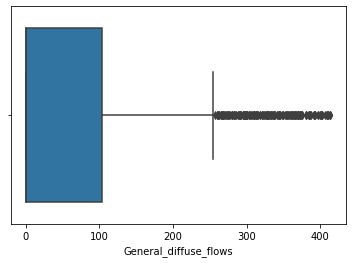

In [148]:
sns.boxplot(x=df["General_diffuse_flows"])


In [149]:
#finding different quartile values of Diffuse_flows
Q1= np.percentile(df["Diffuse_flows"],25,interpolation="midpoint")
Q2= np.percentile(df["Diffuse_flows"],50,interpolation="midpoint")
Q3= np.percentile(df["Diffuse_flows"],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)

0.122
0.152
45.155


In [150]:
#finding IQR
IQR= Q3-Q1
IQR
#finding lowe limit & upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-67.4275
112.7045


In [151]:
#removing all the value below low limit& above upper limt
outlier=[]
for x in df["Diffuse_flows"]:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)

In [152]:
outlier

[128.9,
 219.1,
 246.0,
 248.1,
 231.6,
 211.9,
 201.7,
 163.0,
 144.3,
 120.6,
 121.3,
 184.0,
 238.0,
 253.4,
 248.1,
 227.3,
 200.6,
 175.0,
 148.2,
 123.7,
 155.7,
 215.7,
 256.6,
 257.7,
 240.7,
 218.7,
 193.2,
 166.5,
 142.4,
 121.2,
 141.6,
 199.9,
 254.4,
 281.1,
 260.8,
 249.6,
 227.1,
 195.4,
 165.7,
 138.9,
 144.8,
 161.9,
 236.0,
 208.6,
 195.5,
 245.4,
 220.1,
 208.0,
 182.3,
 150.3,
 115.4,
 116.0,
 137.7,
 151.9,
 146.1,
 133.6,
 138.8,
 191.8,
 253.7,
 202.0,
 167.0,
 176.0,
 197.0,
 218.2,
 216.5,
 202.6,
 231.8,
 248.8,
 284.8,
 172.3,
 222.0,
 271.5,
 287.6,
 254.7,
 226.7,
 207.5,
 183.2,
 169.0,
 165.5,
 161.1,
 158.8,
 146.8,
 142.8,
 144.1,
 133.8,
 113.6,
 134.6,
 211.5,
 202.3,
 199.1,
 205.5,
 181.4,
 201.5,
 171.7,
 189.4,
 194.3,
 166.2,
 149.8,
 138.7,
 133.5,
 116.6,
 122.1,
 191.0,
 276.7,
 299.9,
 306.1,
 295.5,
 272.2,
 247.4,
 201.6,
 132.2,
 132.2,
 116.2,
 117.8,
 118.4,
 122.5,
 125.0,
 168.4,
 113.7,
 167.6,
 144.3,
 158.0,
 131.4,
 121.7,
 118.9,


In [153]:
#finding index of this outliers & droping
index=df["Diffuse_flows"][(df["Diffuse_flows"]<low_lim)|(df["Diffuse_flows"]>up_lim)].index
df.drop(index,inplace=True)

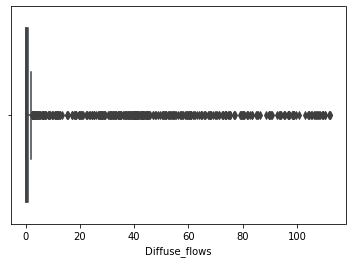

In [154]:
sns.boxplot(x=df["Diffuse_flows"])


In [155]:
df.head()

,Temperature,Humidity,Pressure,CloudCover,Wind Speed,General_diffuse_flows,Diffuse_flows,Total_Power_Consumption
0,6.559,73.8,1016.91,0.23,0.083,0.051,0.119,70425.53544
1,6.414,74.5,1016.91,0.23,0.083,0.070,0.085,69320.84387
2,6.313,74.5,1016.91,0.23,0.080,0.062,0.100,67803.22193
3,6.121,75.0,1016.91,0.23,0.083,0.091,0.096,65489.23209
4,5.921,75.7,1016.91,0.23,0.081,0.048,0.085,63650.44627


In [156]:
df.describe()

,Temperature,Humidity,Pressure,CloudCover,Wind Speed,General_diffuse_flows,Diffuse_flows,Total_Power_Consumption
count,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000
mean,11.950636,75.968315,1014.664964,0.452024,0.080354,33.299289,11.271995,66644.446345
std,3.160690,7.802835,1.223158,0.318719,0.005853,88.266562,24.932389,17606.685910
min,4.212000,46.430000,1012.440000,0.000000,0.065000,0.011000,0.052000,39239.457920
25%,9.565000,71.400000,1013.890000,0.190000,0.075000,0.055000,0.119000,51148.044220
50%,12.530000,76.900000,1014.440000,0.310000,0.080000,0.070000,0.141000,60234.507790
75%,14.675000,82.300000,1015.680000,0.750000,0.085000,0.900000,0.925500,85913.016340
max,18.670000,88.900000,1016.910000,1.000000,0.100000,413.900000,112.300000,97602.871350


### 3. Exploratory Data Analysis

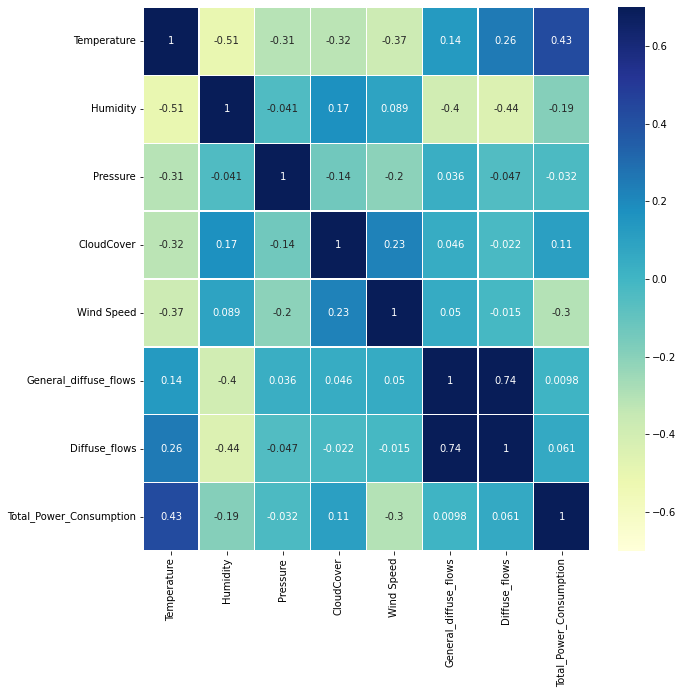

In [157]:
corr= df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,vmin=-0.7, vmax=0.7,linewidths=0.2,annot=True,cmap="YlGnBu")

There is low correlation between features. So further reduction of features are not possible. 

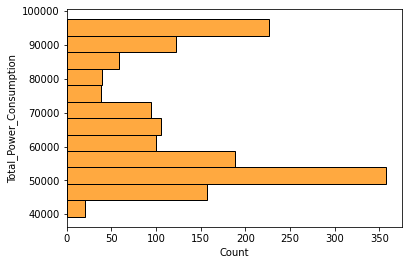

In [158]:
#univarient analysis
#histogram
sns.histplot(y="Total_Power_Consumption",data=df,color="darkorange")

Total Power Consumption is 50000KWh at most of the time.

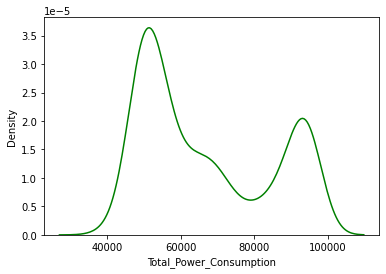

In [159]:
#distplot
sns.distplot(df["Total_Power_Consumption"],hist=False,color="green")

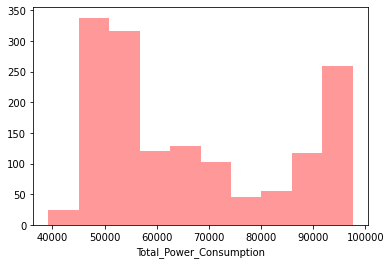

In [160]:
sns.distplot(df["Total_Power_Consumption"],kde=False,color="red",bins=10)

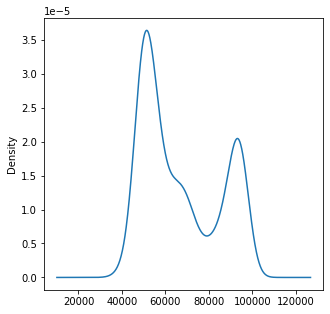

In [161]:
plt.figure(figsize=(5,5))
df["Total_Power_Consumption"].plot(kind="density")

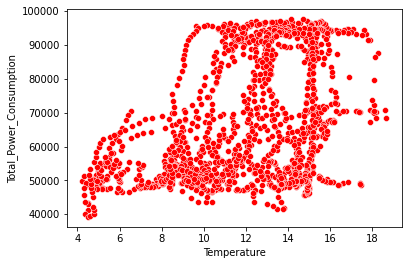

In [162]:
#bivarient analysis
sns.scatterplot(df["Temperature"],df["Total_Power_Consumption"],color="red")

There is a relation between Temperature and Total Power Consumption.

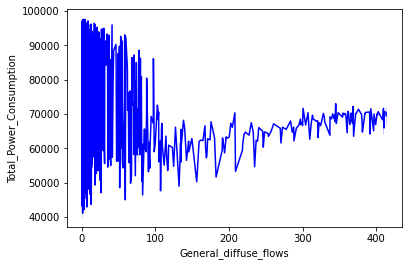

In [163]:
#lineplot
sns.lineplot(df["General_diffuse_flows"],df["Total_Power_Consumption"],color="blue")

There is a decrease in range of total power consuption when general diffuse flow increases.

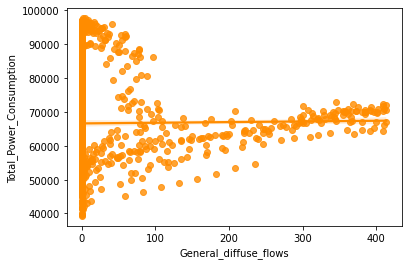

In [164]:
#regplot
#regplot is a scatterplot with a regression line to it.
sns.regplot(df["General_diffuse_flows"],df["Total_Power_Consumption"],color="darkorange")

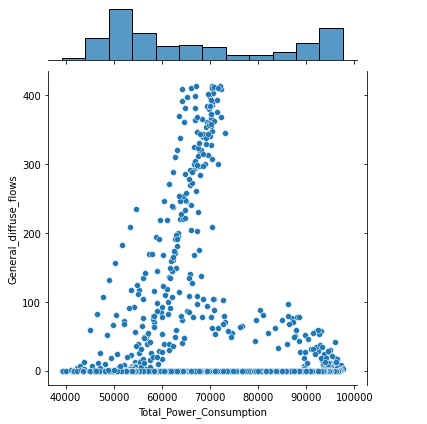

In [165]:
sns.jointplot(x="Total_Power_Consumption",y="General_diffuse_flows",data=df)

In [166]:
 
#sns.stripplot(x=df["Temperature"],y=df["Total_Power_Consumption"])

In [167]:
#sns.pairplot(df)

In [168]:
#splitting of the data into features and target.
x=df.drop(columns=["Total_Power_Consumption"],axis=1)
y=df["Total_Power_Consumption"]

In [169]:
print(x.shape)
print(y.shape)

(1507, 7)
(1507,)


In [170]:
from sklearn.model_selection import train_test_split
#split the Dataset into train and test
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.25)

In [171]:
x_train.shape

(1130, 7)

In [172]:
y_train.shape

(1130,)

In [173]:
x_test.shape

(377, 7)

In [174]:
y_test.shape

(377,)

In [175]:
t=[]

### 4.Modelling

Target is not a discrete number. So, following regression models are used for prediction.

### 4.1 Linear Regression

In [176]:
from math import sqrt
#perform linear regression
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
#make prediction using the model
predictions=model.predict(x_test)

In [177]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('RMSE is',sqrt(mean_squared_error(y_test,predictions)))

RMSE is 14858.003843427252


In [178]:
rsquare= r2_score(y_test,predictions)
print('R2 value:',r2_score(y_test,predictions))

R2 value: 0.3301218823250326


In [179]:
t.append(['Linear Regession',round(sqrt(mean_squared_error(y_test,predictions)),5),round(r2_score(y_test,predictions),5)])

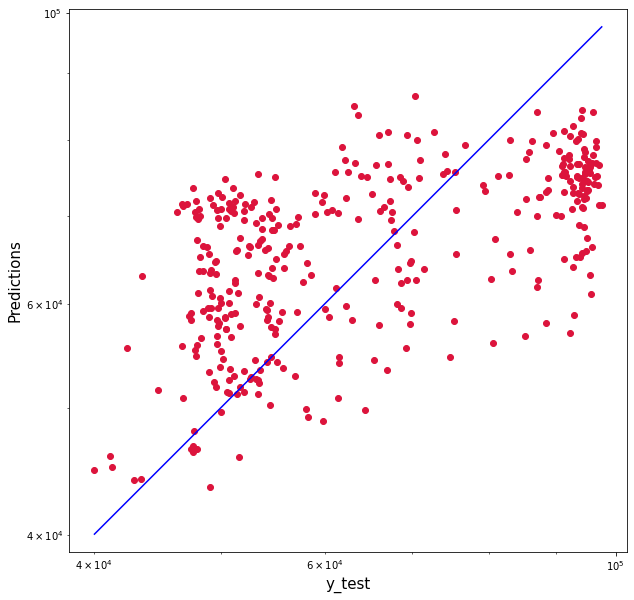

In [180]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('y_test', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

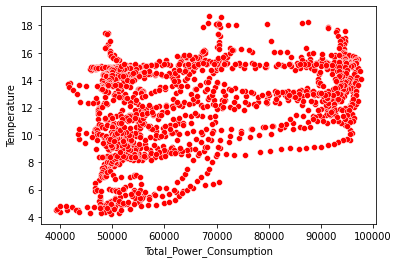

In [181]:
sns.scatterplot(df["Total_Power_Consumption"],df["Temperature"],color="red")

In [182]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [183]:
df.describe()

,Temperature,Humidity,Pressure,CloudCover,Wind Speed,General_diffuse_flows,Diffuse_flows,Total_Power_Consumption
count,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000
mean,11.950636,75.968315,1014.664964,0.452024,0.080354,33.299289,11.271995,66644.446345
std,3.160690,7.802835,1.223158,0.318719,0.005853,88.266562,24.932389,17606.685910
min,4.212000,46.430000,1012.440000,0.000000,0.065000,0.011000,0.052000,39239.457920
25%,9.565000,71.400000,1013.890000,0.190000,0.075000,0.055000,0.119000,51148.044220
50%,12.530000,76.900000,1014.440000,0.310000,0.080000,0.070000,0.141000,60234.507790
75%,14.675000,82.300000,1015.680000,0.750000,0.085000,0.900000,0.925500,85913.016340
max,18.670000,88.900000,1016.910000,1.000000,0.100000,413.900000,112.300000,97602.871350


### 4.2 KNN

In [184]:
#knn
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
rms=9999
rmse_values=[]
nib=np.arange(3,50)
for k in nib:
    k=k+1
    model=neighbors.KNeighborsRegressor(n_neighbors=k, metric='minkowski')
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    error=sqrt(mean_squared_error(y_test,pred))
    rmse_values.append(error)
    if error<rms:
        opt_k=k
        rms=error
opt_k
      
   

4

In [185]:
knn_model=neighbors.KNeighborsRegressor(n_neighbors=4, metric='minkowski')
knn_model.fit(x_train,y_train)
pred=knn_model.predict(x_test)
error=sqrt(mean_squared_error(y_test,pred))
print(error)

6381.252215006656


In [186]:
rsquare= r2_score(y_test,pred)
print('R2 value:',r2_score(y_test,pred))

R2 value: 0.876437502192108


In [187]:
t.append(['KNN',round(sqrt(mean_squared_error(y_test,pred)),5),round(r2_score(y_test,pred),5)])

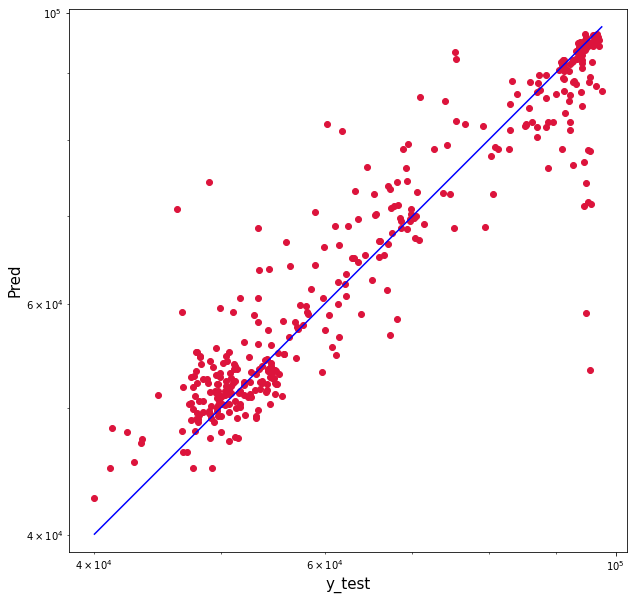

In [188]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('y_test', fontsize=15)
plt.ylabel('Pred', fontsize=15)
plt.axis('equal')
plt.show()

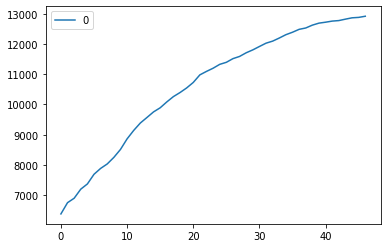

In [189]:
#plotting the rmse values against k values
curve=pd.DataFrame(rmse_values)
curve.plot()

### 4.3 SVR

In [190]:
from sklearn.svm import SVR
svm_regressor=SVR(kernel="rbf")
svm_regressor.fit(x_train,y_train)
y_pred=svm_regressor.predict(x_test)
error=sqrt(mean_squared_error(y_test,y_pred))
print(error)

19282.790758504343


In [191]:
rsquare= -(r2_score(y_test,y_pred))
print('R2 value:',rsquare)

R2 value: 0.12827414433739226


In [192]:
t.append(['SVR',round(error,5) ,round(rsquare,5)])

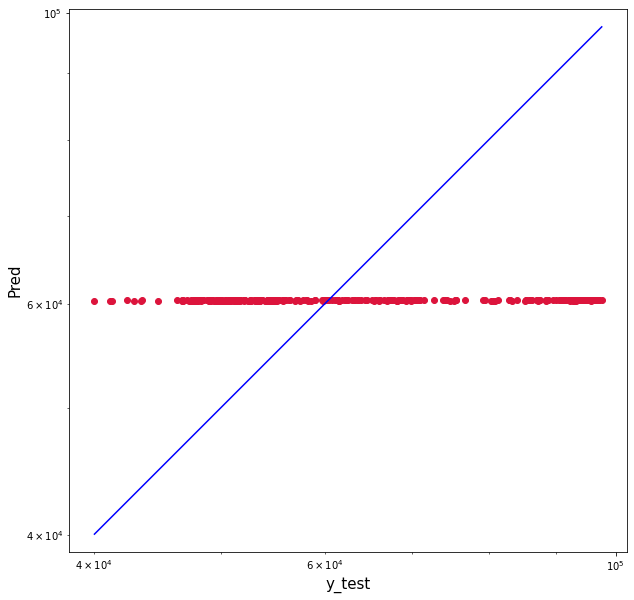

In [193]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('y_test', fontsize=15)
plt.ylabel('Pred', fontsize=15)
plt.axis('equal')
plt.show()

### 4.4 Decision Tree 

In [194]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
error=sqrt(mean_squared_error(y_test,y_pred))
print(error)


11671.37422147711


In [195]:
rsquare= r2_score(y_test,y_pred)
print('R2 value:',r2_score(y_test,y_pred))

R2 value: 0.5866491387129924


In [196]:
t.append(['Decision Tree',round(sqrt(mean_squared_error(y_test,y_pred)),5),round(r2_score(y_test,y_pred),5)])

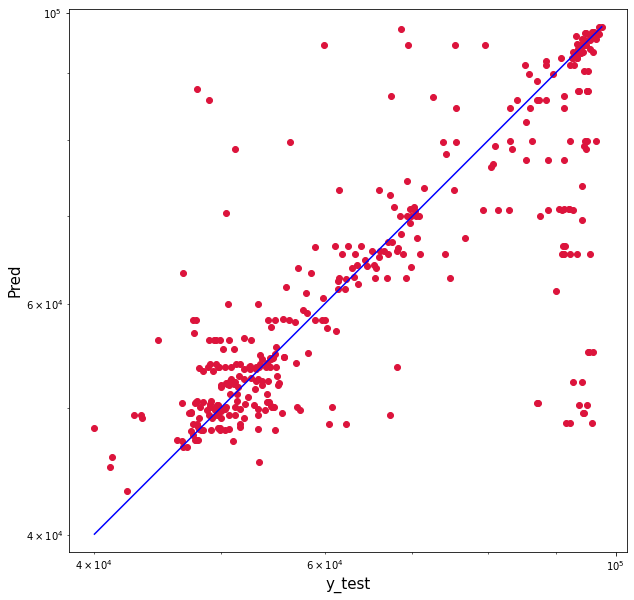

In [197]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('y_test', fontsize=15)
plt.ylabel('Pred', fontsize=15)
plt.axis('equal')
plt.show()

### 4.5 Random Forest

In [198]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
error=sqrt(mean_squared_error(y_test,y_pred))
print(error)

9354.778858555746


In [199]:
rsquare= r2_score(y_test,y_pred)
print('R2 value:',r2_score(y_test,y_pred))

R2 value: 0.7344526880350405


In [200]:
t.append(['Random Forest',round(sqrt(mean_squared_error(y_test,y_pred)),5),round(r2_score(y_test,y_pred),5)])

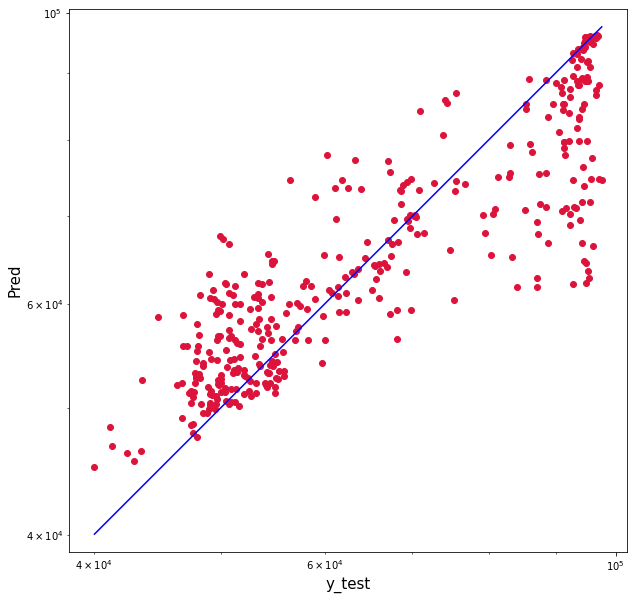

In [201]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('y_test', fontsize=15)
plt.ylabel('Pred', fontsize=15)
plt.axis('equal')
plt.show()

In [202]:
values = pd.DataFrame(t, columns = ['Algorithms', 'RMSE','R2'])
values

,Algorithms,RMSE,R2
0,Linear Regession,14858.00384,0.33012
1,KNN,6381.25222,0.87644
2,SVR,19282.79076,0.12827
3,Decision Tree,11671.37422,0.58665
4,Random Forest,9354.77886,0.73445


__KNN model__ has highest __R2__ value and lowest __RMSE__ value. So it is the most suitable model as compared to other models for prediction

### 5. Model Fine Tuning

In [203]:
knn_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [204]:
rft=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform')  

In [205]:
rft.fit(x_train,y_train)

KNeighborsRegressor()

In [206]:
y_pred=rft.predict(x_test)
error=sqrt(mean_squared_error(y_test,pred))
rsquare= r2_score(y_test,pred)
print('R2 value:',r2_score(y_test,pred))

R2 value: 0.876437502192108


In [207]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [208]:
y_pred=gb.predict(x_test)
error=sqrt(mean_squared_error(y_test,pred))
rsquare= r2_score(y_test,pred)
print('R2 value:',r2_score(y_test,pred))

R2 value: 0.876437502192108


In [209]:

from xgboost import XGBRegressor
xb=XGBRegressor()
xb.fit(x_train,y_train)

[15:41:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [210]:
y_pred=xb.predict(x_test)
error=sqrt(mean_squared_error(y_test,pred))
rsquare= r2_score(y_test,pred)
print('R2 value:',r2_score(y_test,pred))

R2 value: 0.876437502192108


In [211]:
v = pd.DataFrame({'Predicted Data': pred, 'Test Data' : y_test})
v.sample(10)

,Predicted Data,Test Data
1432,72776.763215,80636.45471
742,52088.665185,49776.16096
703,88229.504890,93359.98688
343,60668.599245,59821.74441
1278,76598.778733,92837.38147
1317,54276.986480,49036.65226
276,82603.917847,86339.22749
162,53339.518328,47846.19395
758,53317.486785,54300.70364
1099,62530.944977,65202.72272


'knn_model' is the best model for predicting the total powerconsumption Tetuan City

Submitted by Group 6
Members are,
- Amruthendu M 
- Jagan S
- Varsha M
- Nitha S Kumar